In [1]:
import numpy as np
from matplotlib import pyplot as plt
import shelve

In [2]:
bk_restore = shelve.open('mcmc_unlabel_sim_poi_nbdadta.pkl')
for k in bk_restore:
    try:
        globals()[k]=bk_restore[k]
        tmp[k] = bk_restore[k]
    except:
        pass
bk_restore.close()

/home/gw2397/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gw2397/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/gw2397/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gw2397/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [4]:
iter_use_start = int(n_iter/4)

# 1. Similarity matrix

## 1A. neuron

In [5]:
simMat_neuron = np.zeros((N,N))
count = 0
for g in range(iter_use_start, n_iter):
    count = count + 1
    for k in range(simMat_neuron.shape[0]):
        simMat_neuron[k,:] = simMat_neuron[k,:] + (Z_fit[g,k] == Z_fit[g,:])
simMat_neuron = simMat_neuron/count

simMat_neuron_true = np.zeros((N,N))
for k in range(simMat_neuron_true.shape[0]):
    simMat_neuron_true[k,:] = (lab_neuron[k] == lab_neuron)

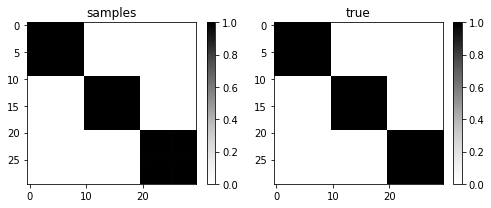

In [19]:
plt.rcParams['figure.figsize'] = [7, 3]
fig, ax = plt.subplots(1, 2)
z1 = ax[0].imshow(simMat_neuron, aspect="auto", cmap = 'Greys')
ax[0].set_title('samples')
plt.colorbar(z1, ax= ax[0])
z2 = ax[1].imshow(simMat_neuron_true, aspect="auto", cmap = 'Greys')
ax[1].set_title('true')
plt.colorbar(z2, ax= ax[1])
fig.tight_layout()

plt.rcParams['figure.figsize'] = [5, 5]
plt.savefig("poi_simMat_neuron.svg")

## 1B. states

In [7]:
simMat_state = np.zeros((T,T))
count = 0
for g in range(iter_use_start, n_iter):
    count = count + 1
    for k in range(simMat_state.shape[0]):
        simMat_state[k,:] = simMat_state[k,:] + (dynamics_fit[g]['states'][k] == dynamics_fit[g]['states'])
simMat_state = simMat_state/count

simMat_state_true = np.zeros((T,T))
for k in range(simMat_state_true.shape[0]):
    simMat_state_true[k,:] = (lab_t[k] == lab_t)
sim_order = np.append(np.where(lab_t == 0)[0], np.where(lab_t == 1)[0])

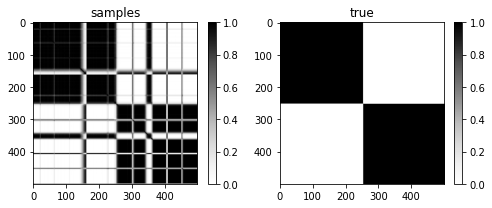

In [20]:
plt.rcParams['figure.figsize'] = [7, 3]
fig, ax = plt.subplots(1, 2)
z1 = ax[0].imshow(simMat_state[np.ix_(sim_order, sim_order)], aspect="auto", cmap = 'Greys')
ax[0].set_title('samples')
plt.colorbar(z1, ax= ax[0])
z2 = ax[1].imshow(simMat_state_true[np.ix_(sim_order, sim_order)], aspect="auto", cmap = 'Greys')
ax[1].set_title('true')
plt.colorbar(z2, ax= ax[1])
fig.tight_layout()

plt.rcParams['figure.figsize'] = [5, 5]
plt.savefig("poi_simMat_states.svg")

# 2. maxPEAR of states

In [9]:
states_samp = np.zeros((n_iter, T))
for mm in range(n_iter):
    states_samp[mm,:] = dynamics_fit[mm]['states']
states_samp_use = states_samp[iter_use_start:,:]
np.savetxt("states_samp_poi.csv", states_samp_use, delimiter=",")

In [ ]:
states_samp_maxPEAR = np.loadtxt("states_samp_maxPEAR_poi.csv", delimiter=",", dtype = int) - 1

# align to truth
np.unique(states_samp_maxPEAR) # 2
swap = {0: 1, 1:0}
states_samp_maxPEAR_swap = np.array([swap[x] for x in states_samp_maxPEAR])

sum((states_samp_maxPEAR - lab_t)**2)
sum((states_samp_maxPEAR_swap - lab_t)**2)

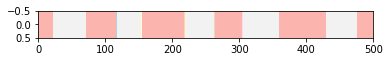

In [21]:
plt.rcParams['figure.figsize'] = [6, .5]
plt.imshow(states_samp_maxPEAR[None,:], aspect="auto", cmap='Pastel1')
plt.xlim([0, T])
plt.savefig("poi_states_maxPEAR.svg")